In [1]:
import os
import cv2
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import imageio

In [8]:
def load_images_from_folder(folder):
    image_list = []
    labels_list = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        if os.path.isdir(path):
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    image_list.append(img)
                    labels_list.append(filename) 
    return image_list, labels_list

In [10]:
images, labels = load_images_from_folder(grouped_dir)
print(f"Loaded {len(images)} images.")

Loaded 7200 images.


In [11]:
# Loading images
grouped_dir = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/coil-100/processed/grouped"
images, labels = load_images_from_folder(grouped_dir)

In [12]:
# Randomly sample 1000 images
sample_size = 1000
indices = np.random.choice(len(images), sample_size, replace=False)
sampled_images = [images[i] for i in indices]
sampled_labels = [labels[i] for i in indices]

In [13]:
# Compute MSE between two images
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [15]:
# Compute pairwise dissimilarity matrix
n_images_sampled = len(sampled_images)
dissimilarity_matrix = np.zeros((n_images_sampled, n_images_sampled))

for i in range(n_images_sampled):
    for j in range(n_images_sampled):
        dissimilarity_matrix[i, j] = mse(sampled_images[i], sampled_images[j])

In [17]:
subset_train_reshaped = np.array(sampled_images).reshape(len(sampled_images), -1)
subset_train_labels = np.array(sampled_labels)

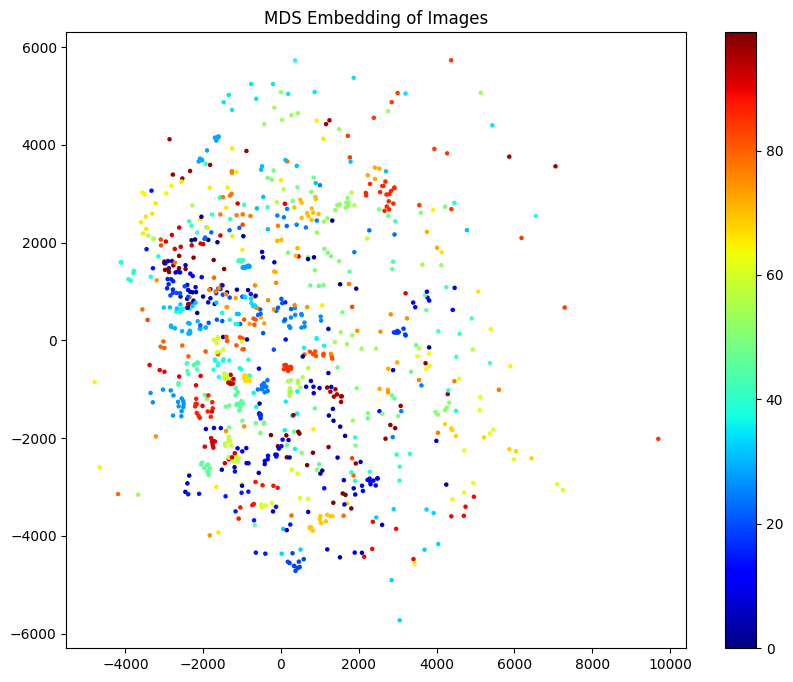

In [26]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(images_transformed[:, 0], images_transformed[:, 1], 
                      c=integer_labels, cmap='jet', s=5)
plt.colorbar(scatter)
plt.title('MDS Embedding of Images')
plt.show()

In [18]:
metrics = [True, False]  # Metric and non-metric MDS
eps_values = [1e-3, 1e-4, 1e-5]  
embeddings = {}

In [19]:
for metric_value in metrics:
    for eps in eps_values:
        embedding = MDS(n_components=2, metric=metric_value, eps=eps, random_state=0)
        train_transformed = embedding.fit_transform(subset_train_reshaped)
        embeddings[(metric_value, eps)] = train_transformed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: Fu

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Convert string labels to integers
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(subset_train_labels)

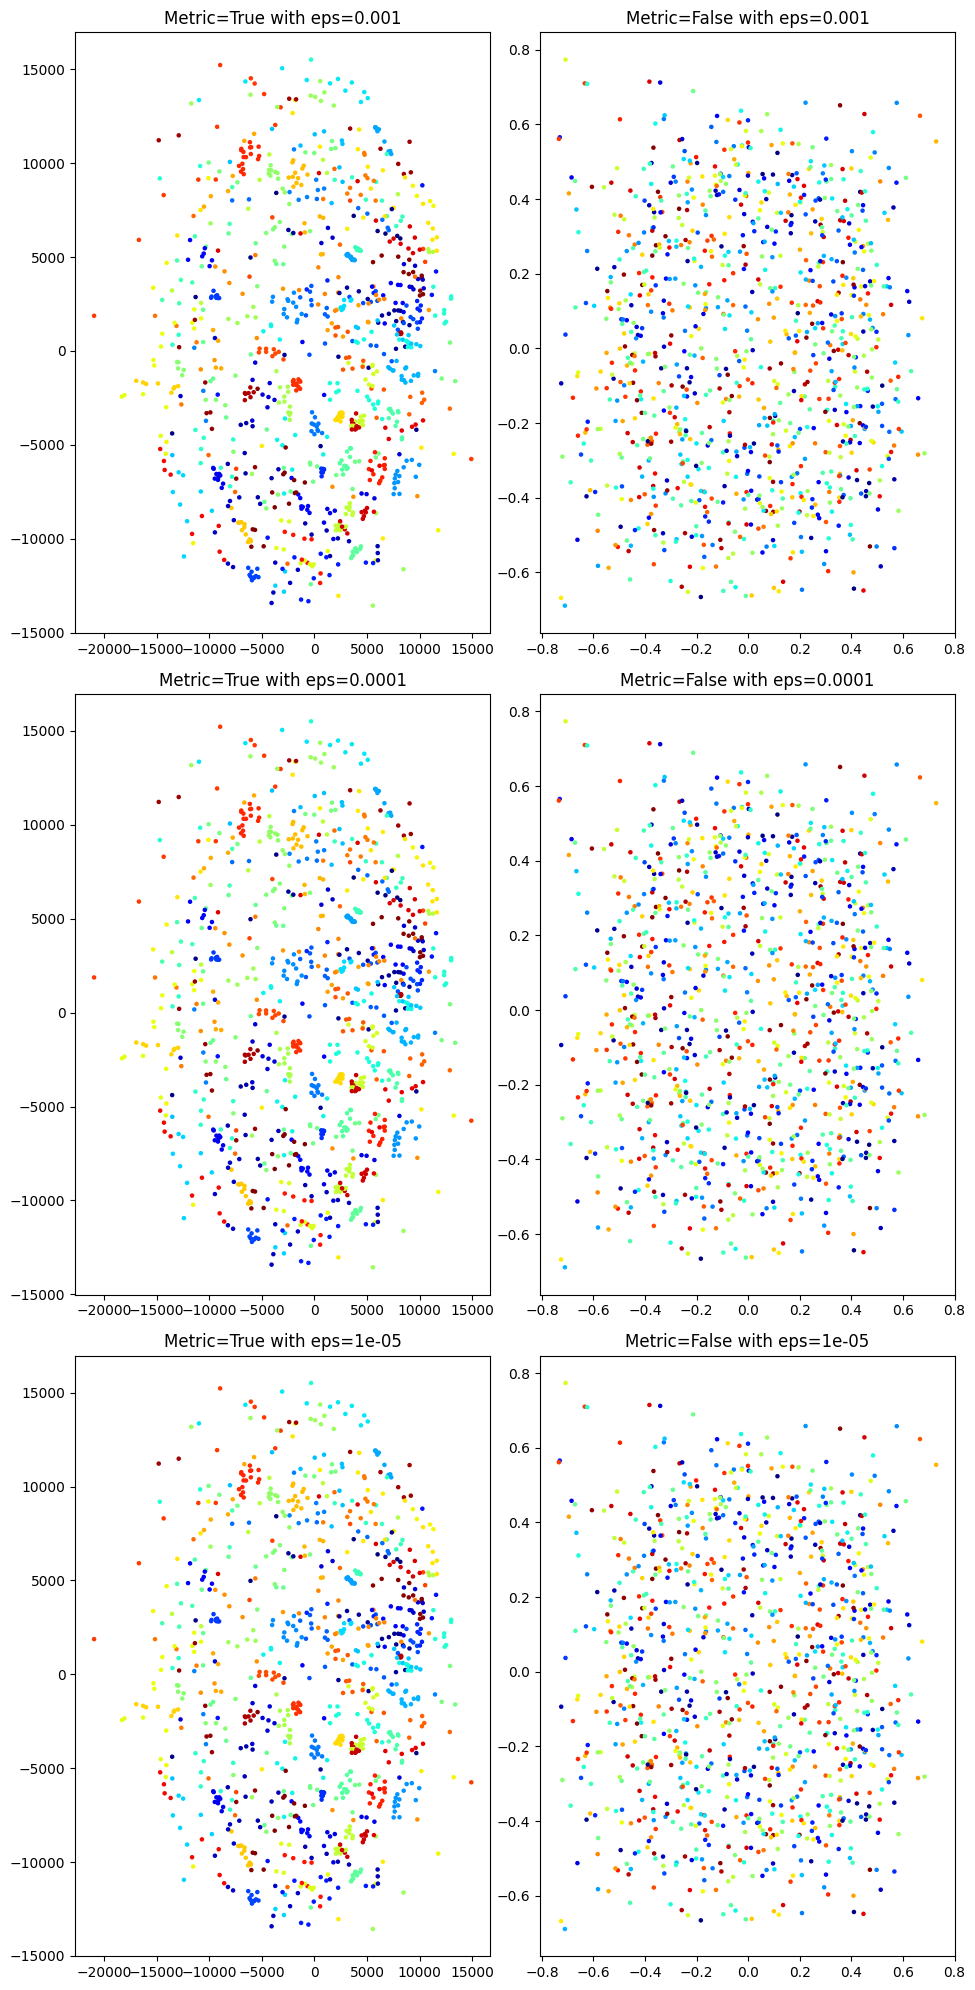

In [24]:
fig, axes = plt.subplots(nrows=len(eps_values), ncols=len(metrics), figsize=(12, 20))

for j, eps in enumerate(eps_values):
    for i, metric_val in enumerate(metrics):
        data = embeddings[(metric_val, eps)]
        ax = axes[j, i]
        sc = ax.scatter(data[:, 0], data[:, 1], c=integer_labels, cmap='jet', s=5)
        metric_str = "Metric=True" if metric_val else "Metric=False"
        ax.set_title(f'{metric_str} with eps={eps}')
        #ax.set_xlabel('MDS Dimension 1')
        #ax.set_ylabel('MDS Dimension 2')

plt.tight_layout()

# Adding color bar
fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(sc, cax=cbar_ax)

plt.show()

In [27]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sp

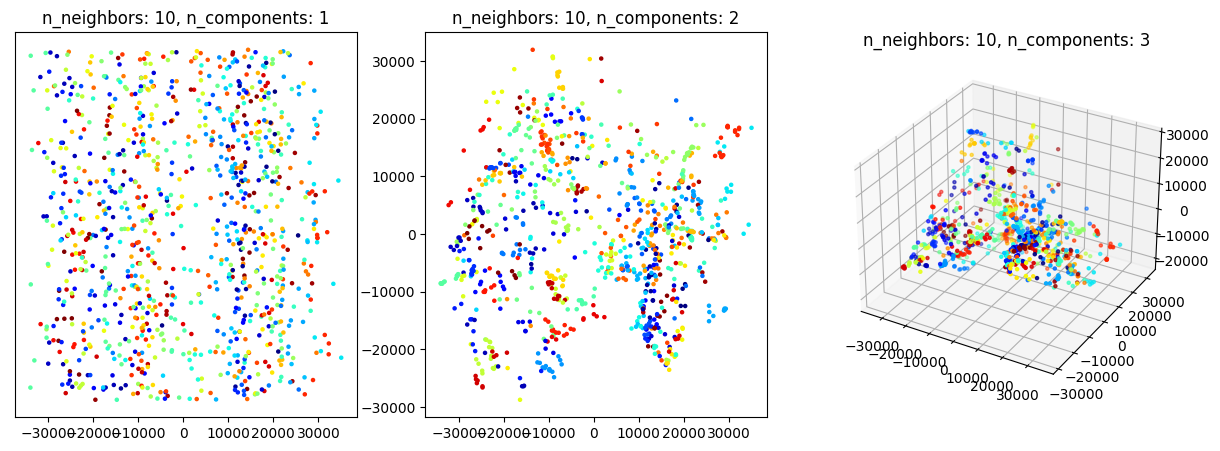

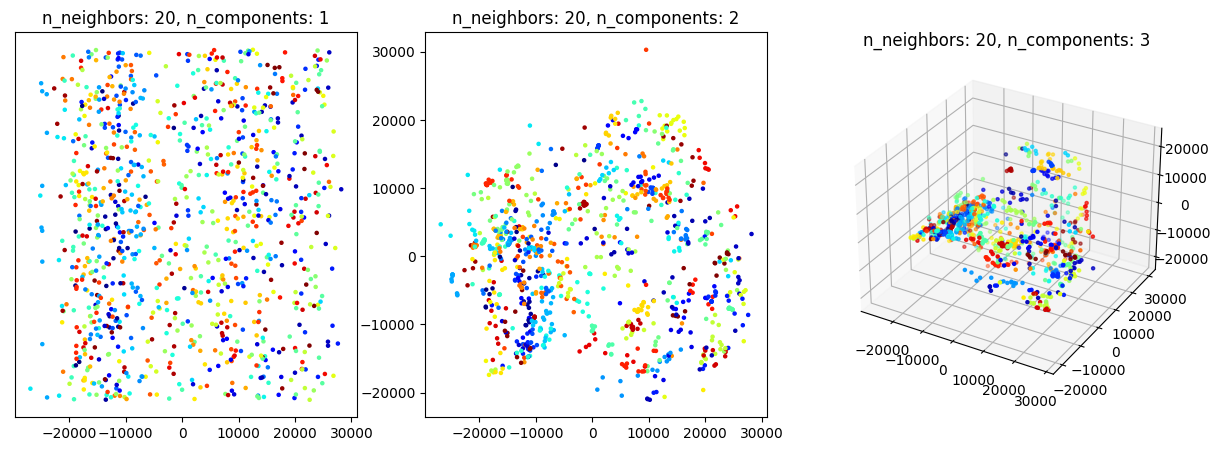

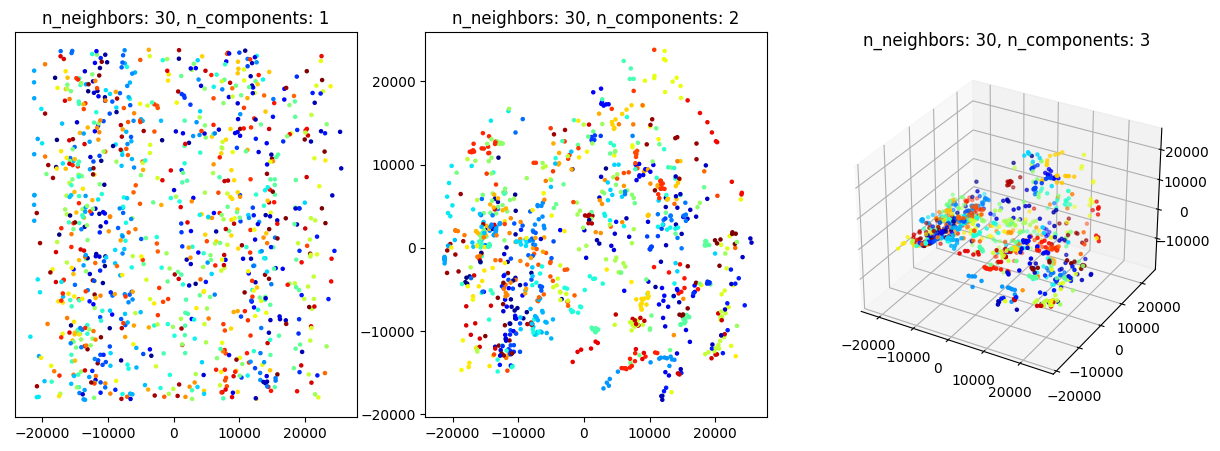

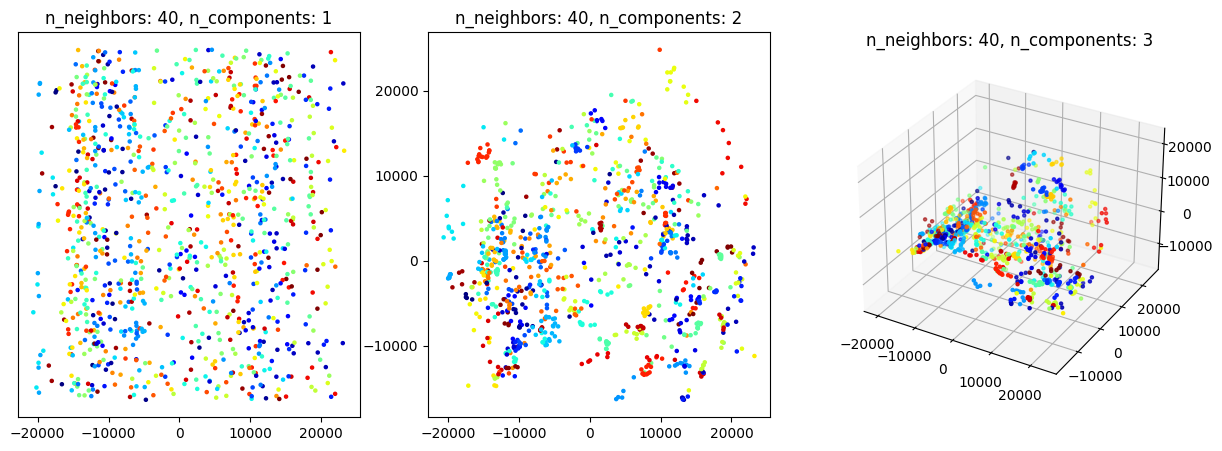

In [28]:
n_neighbors_values = [10, 20, 30, 40]
n_components_values = [1, 2, 3]

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        # Isomap
        isomap = Isomap(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_isomap_data = isomap.fit_transform(subset_train_reshaped)
        
        ax = plt.subplot(1, len(n_components_values), i + 1)
        if n_components_val == 1:
            y_noise = 0.01 * np.random.rand(transformed_isomap_data.shape[0])
            ax.scatter(transformed_isomap_data, y_noise, c=integer_labels, cmap='jet', s=5)
            ax.set_yticks([])
        elif n_components_val == 2:
            ax.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], c=integer_labels, cmap='jet', s=5)
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], transformed_isomap_data[:, 2], c=integer_labels, cmap='jet', s=5)
        
        ax.set_title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
    plt.show()

In [30]:
from sklearn.manifold import TSNE

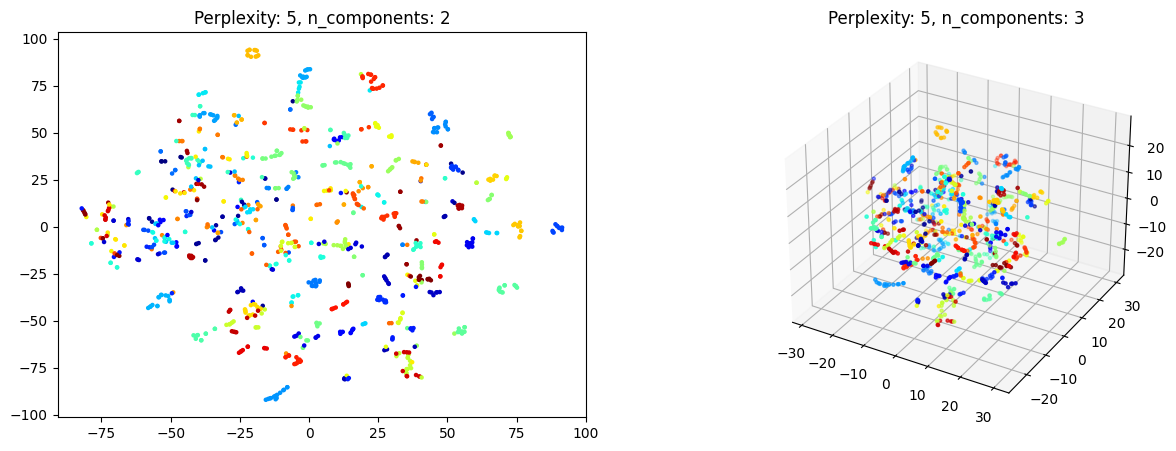

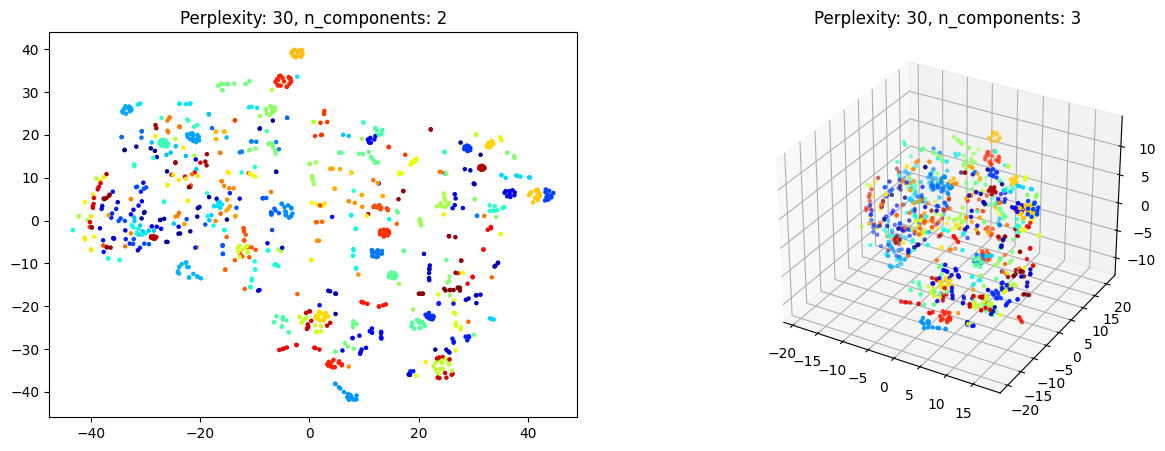

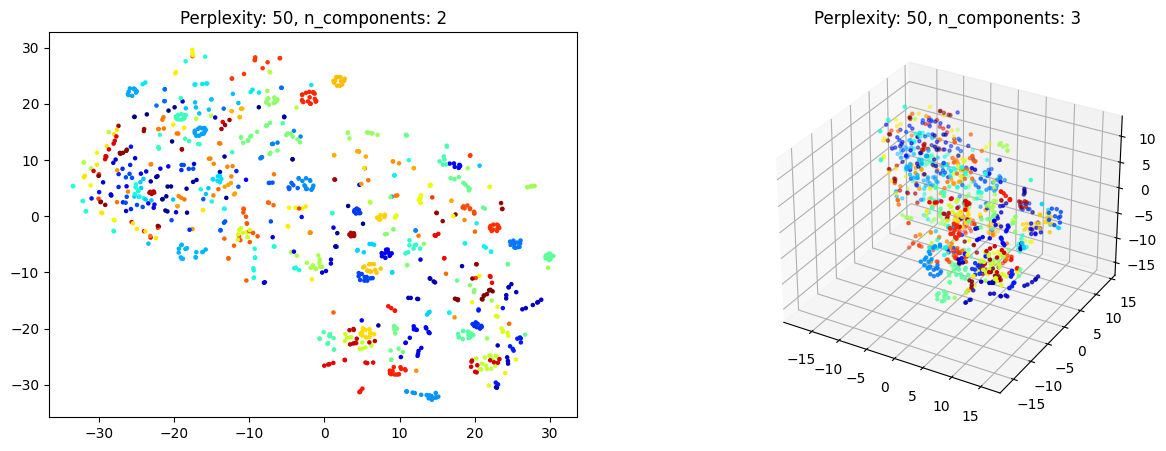

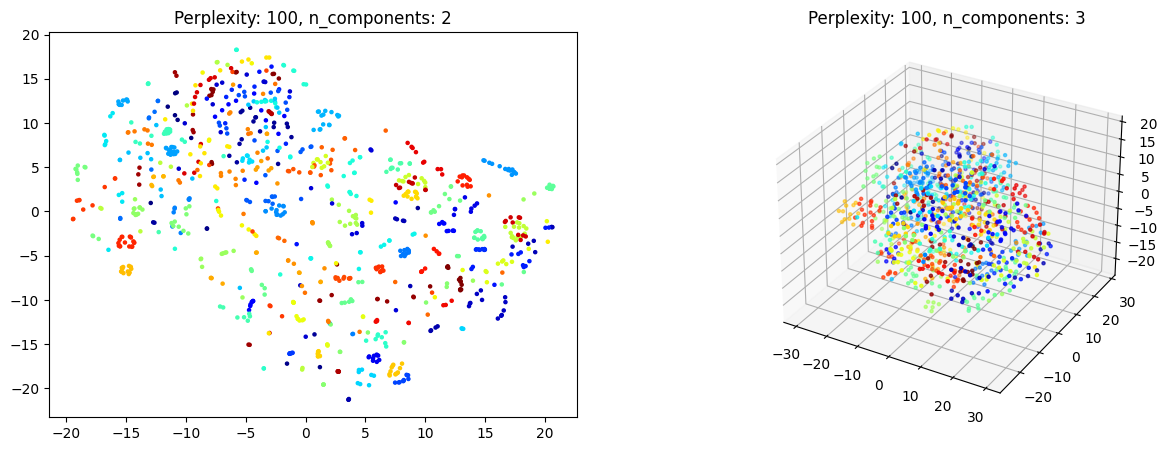

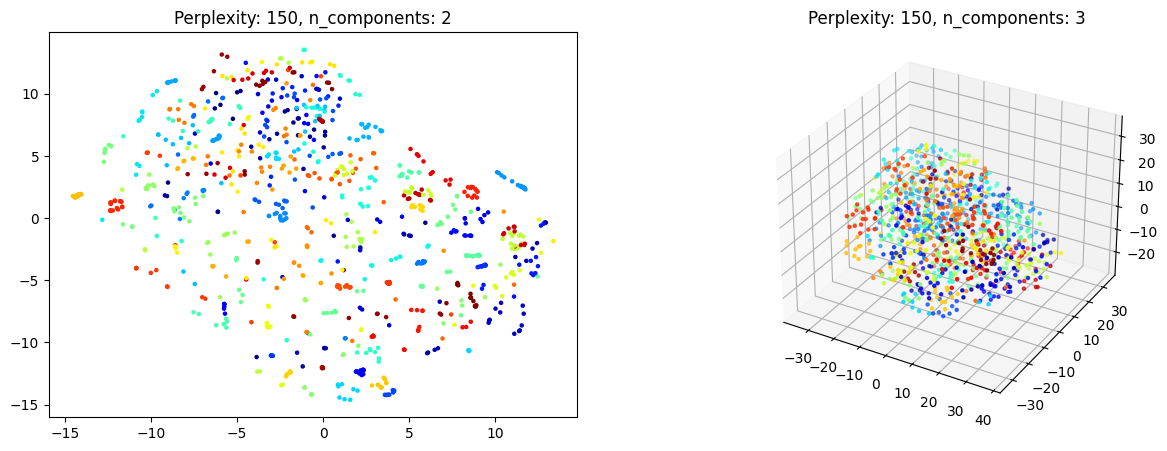

In [33]:
perplexity_values = [5, 30, 50, 100, 150]
n_components_values = [2, 3] 

for perplexity_val in perplexity_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        # t-SNE
        tsne = TSNE(n_components=n_components_val, perplexity=perplexity_val, random_state=42)
        transformed_tsne_data = tsne.fit_transform(subset_train_reshaped)
        
        ax = plt.subplot(1, len(n_components_values), i + 1)
        if n_components_val == 2:
            ax.scatter(transformed_tsne_data[:, 0], transformed_tsne_data[:, 1], c=integer_labels, cmap='jet', s=5)
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_tsne_data[:, 0], transformed_tsne_data[:, 1], transformed_tsne_data[:, 2], c=integer_labels, cmap='jet', s=5)
        
        ax.set_title(f'Perplexity: {perplexity_val}, n_components: {n_components_val}')
    plt.show()

In [34]:
from sklearn.manifold import LocallyLinearEmbedding

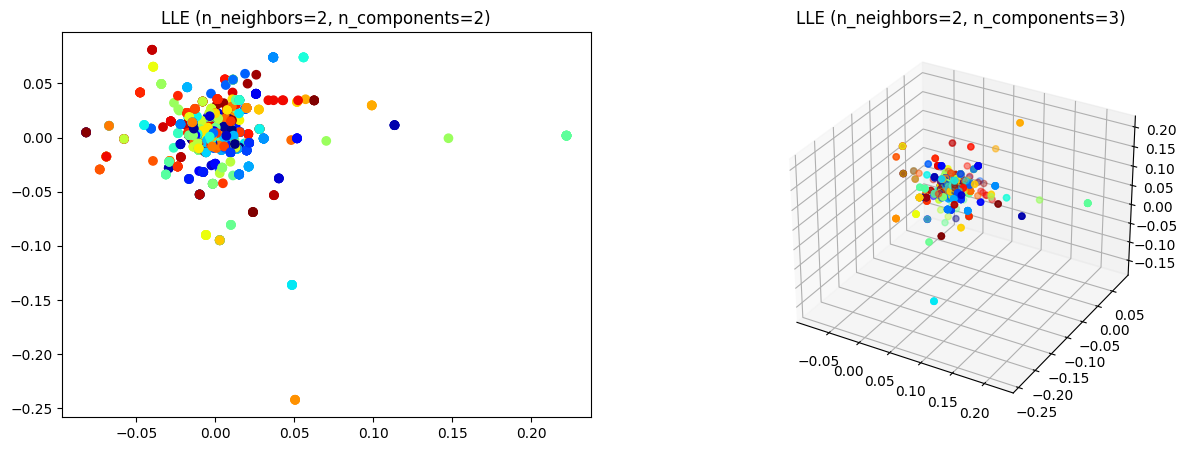

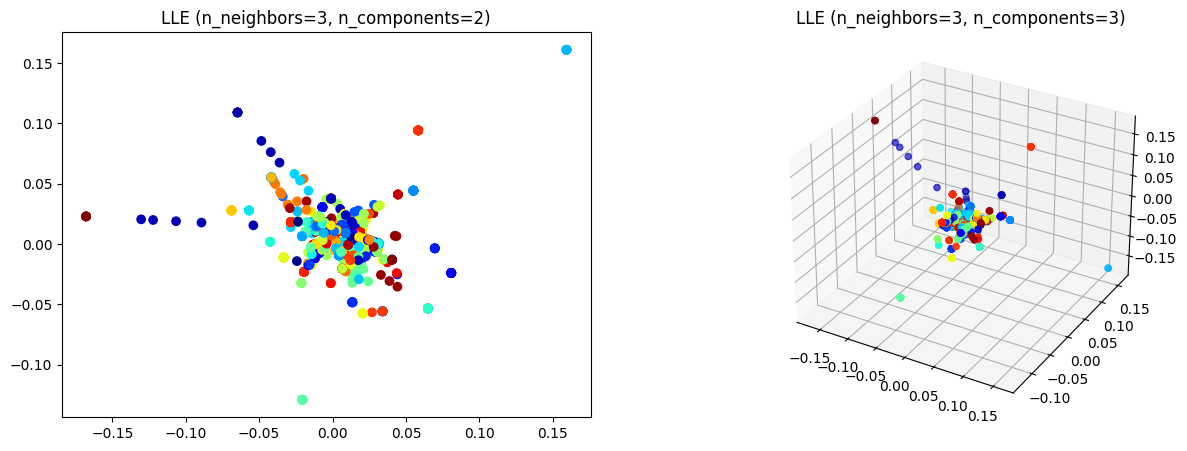

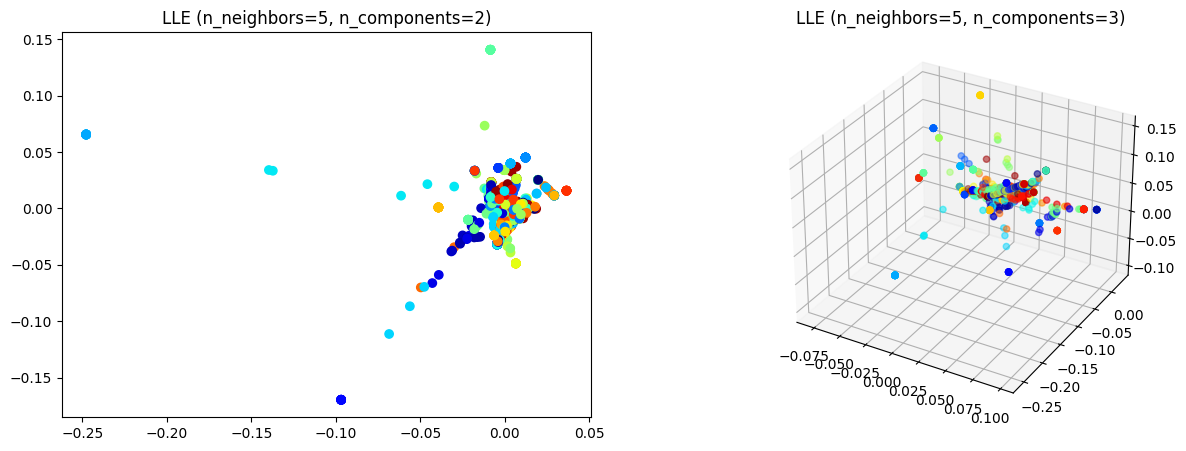

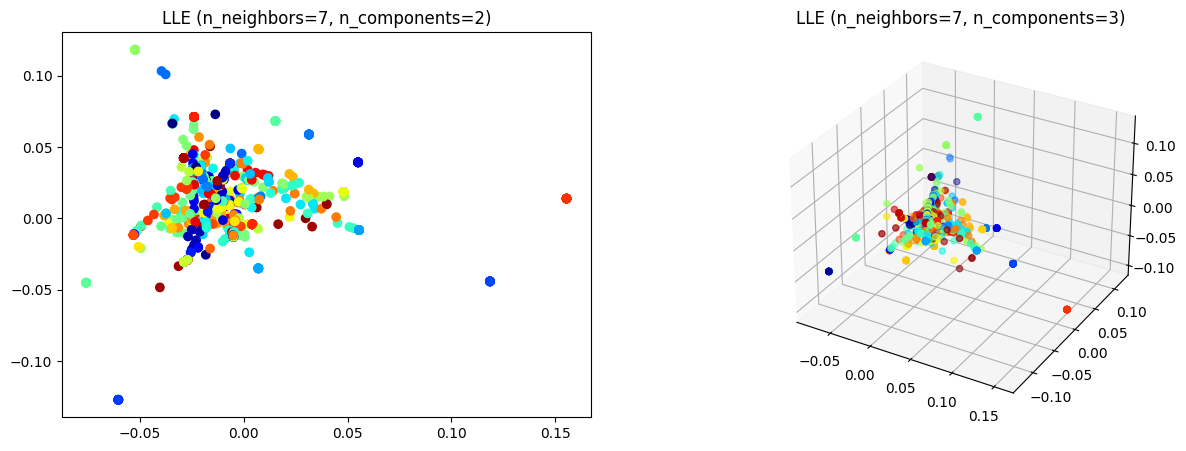

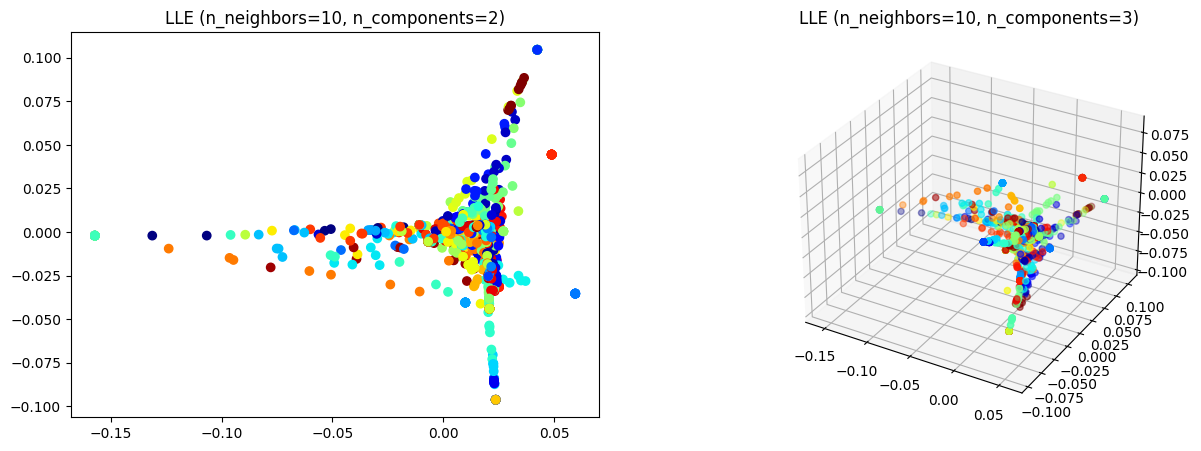

In [42]:
n_neighbors_values = [2, 3, 5, 7, 10]
n_components_values = [2, 3]

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))  
    for i, n_components_val in enumerate(n_components_values):
        
        # LLE with the 'dense' eigen_solver
        lle = LocallyLinearEmbedding(
            n_neighbors=n_neighbors_val,
            n_components=n_components_val,
            eigen_solver='dense', 
            random_state=42
        )
        transformed_lle_data = lle.fit_transform(subset_train_reshaped)
        
        # Plotting
        if n_components_val == 2:
            plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_lle_data[:, 0], transformed_lle_data[:, 1], c=integer_labels, cmap='jet')
            #plt.colorbar()
            plt.title(f'LLE (n_neighbors={n_neighbors_val}, n_components=2)')
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')
            ax.scatter(transformed_lle_data[:, 0], transformed_lle_data[:, 1], transformed_lle_data[:, 2], c=integer_labels, cmap='jet')
            #plt.colorbar()
            ax.set_title(f'LLE (n_neighbors={n_neighbors_val}, n_components=3)')

    plt.show()

In [43]:
from sklearn.manifold import SpectralEmbedding

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


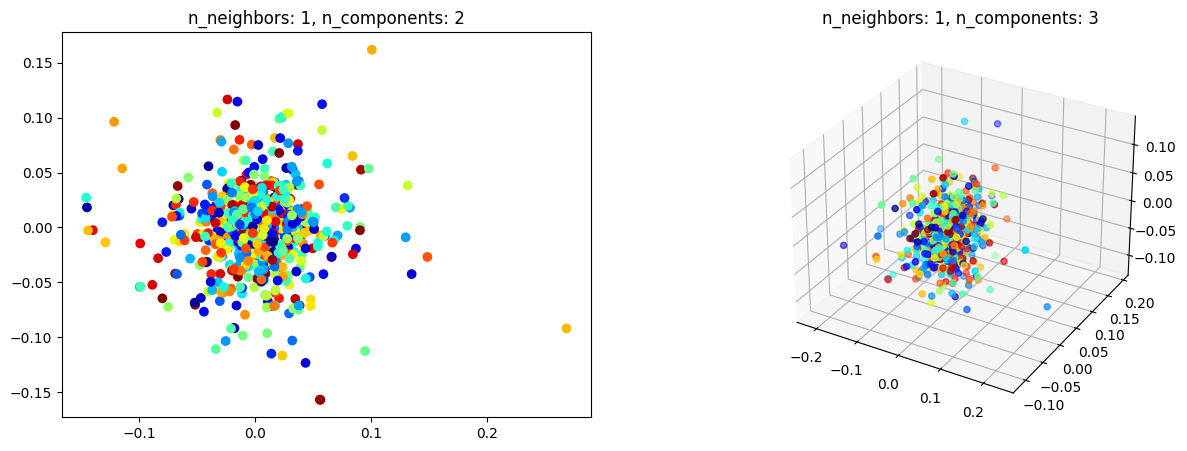

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


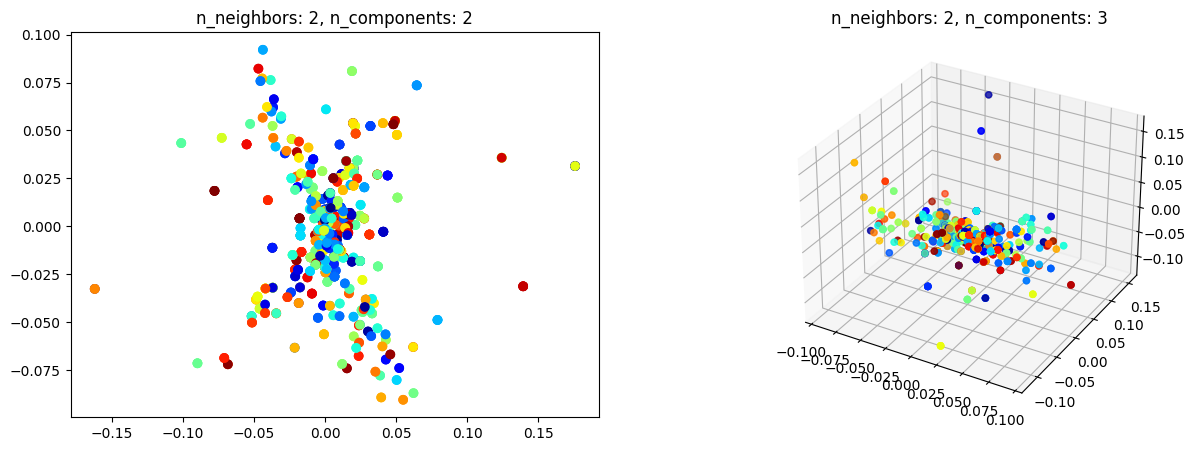

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


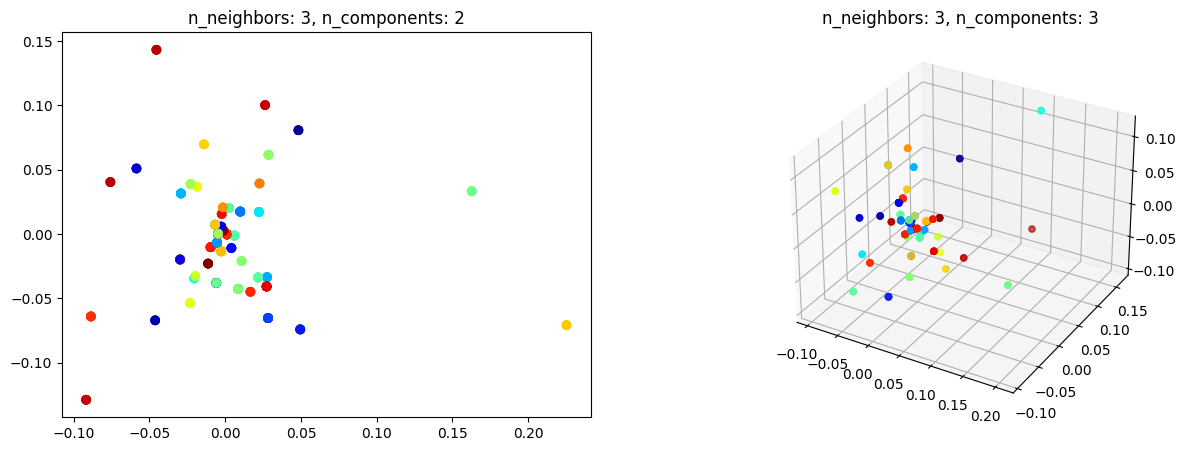

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


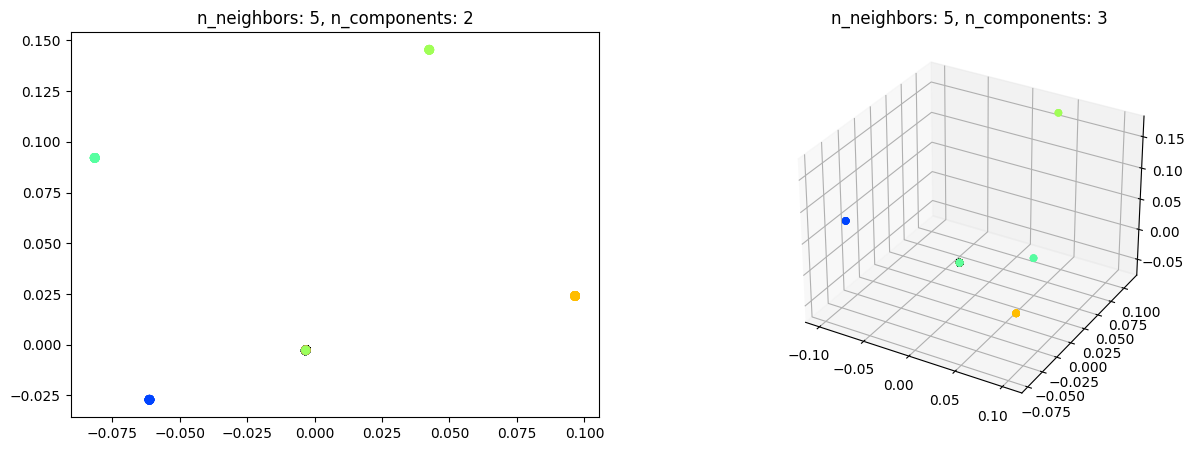

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


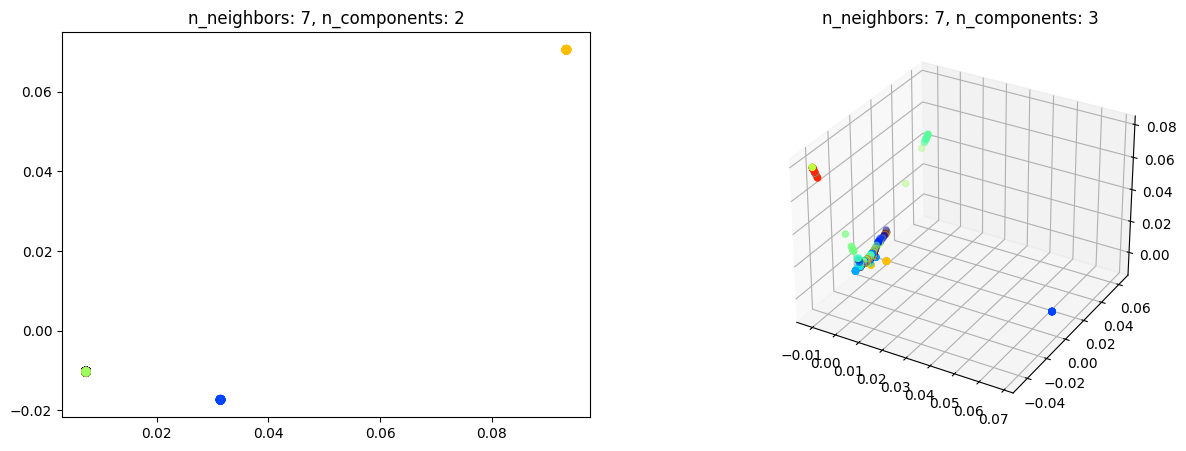

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


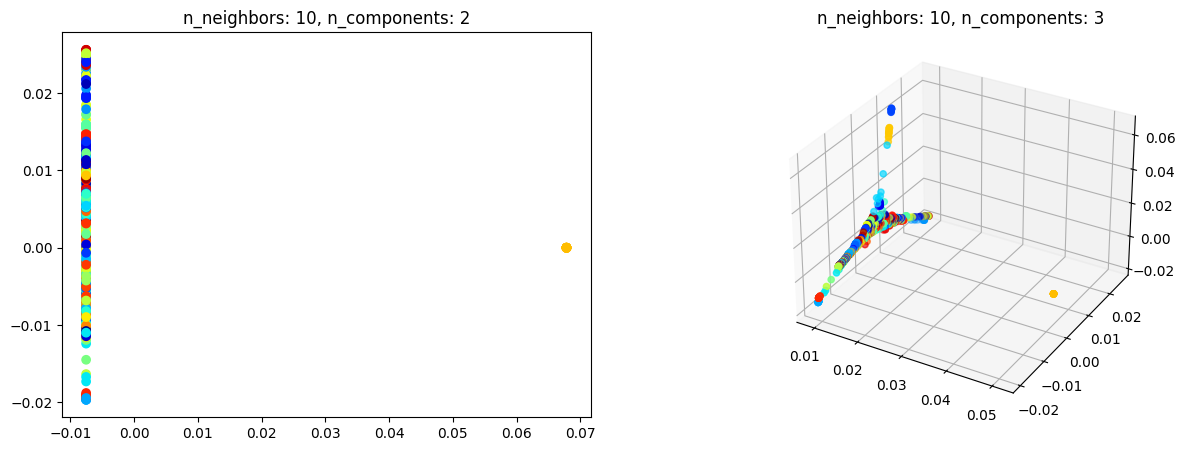

In [46]:
n_neighbors_values = [1, 2, 3, 5, 7, 10]
n_components_values = [2, 3] 

transformed_spectral_data_list = []

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # Spectral Embedding
        spectral = SpectralEmbedding(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_spectral_data = spectral.fit_transform(subset_train_reshaped)
        transformed_spectral_data_list.append((n_neighbors_val, n_components_val, transformed_spectral_data))

        if n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_spectral_data[:, 0], transformed_spectral_data[:, 1], 
                        c=integer_labels, cmap='jet') 
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')
            ax.scatter(transformed_spectral_data[:, 0], transformed_spectral_data[:, 1], transformed_spectral_data[:, 2], 
                       c=integer_labels, cmap='jet')  
            
        plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
        
    plt.show()